## 8.1	文本数据分析工具

### 8.1.2 安装jieba和NLTK语料库

In [1]:
import nltk

In [2]:
nltk.download()    # 打开NLTK下载器

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.corpus import brown       # 导入brown库
brown.words()                          # 查看brown库中所有的单词

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [4]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [5]:
'brown中一共有{}个句子'.format(len(brown.sents()))

'brown中一共有57340个句子'

In [6]:
'brown中一共有{}个单词'.format(len(brown.words()))

'brown中一共有1161192个单词'

## 8.2	文本预处理

### 8.2.2	分词

In [7]:
# 原始英文文本
sentence = 'Python is a structured and powerful object-oriented programming language.'
# 将句子切分为单词
words = nltk.word_tokenize(sentence)
words

['Python',
 'is',
 'a',
 'structured',
 'and',
 'powerful',
 'object-oriented',
 'programming',
 'language',
 '.']

In [8]:
import jieba
# 原始中文文本
sentence = '传智专修学院推出颠覆式办学模式'
# 全模式划分中文句子
terms_list = jieba.cut(sentence, cut_all=True)
print('【全模式】：'+ '/'.join(terms_list))
# 精确模式划分中文句子
terms_list = jieba.cut(sentence, cut_all=False)
print('【精确模式】：'+ '/'.join(terms_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\LXW\AppData\Local\Temp\jieba.cache
Loading model cost 0.606 seconds.
Prefix dict has been built successfully.


【全模式】：传/智/专修/修学/学院/推出/颠覆/式/办学/模式
【精确模式】：传智/专修/学院/推出/颠覆/式/办学/模式


### 8.2.3	词性标注

In [9]:
words = nltk.word_tokenize('Python is a structured and powerful object-oriented programming language.')
# 为列表中的每个单词标注词性
nltk.pos_tag(words)

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('structured', 'JJ'),
 ('and', 'CC'),
 ('powerful', 'JJ'),
 ('object-oriented', 'JJ'),
 ('programming', 'NN'),
 ('language', 'NN'),
 ('.', '.')]

### 8.2.4	词形归一化

In [10]:
# 导入nltk.stem模块的波特词干提取器
from nltk.stem.porter import PorterStemmer
# 按照波特算法提取词干
porter_stem = PorterStemmer()
porter_stem.stem('watched')

'watch'

In [11]:
porter_stem.stem('watching')

'watch'

In [12]:
from nltk.stem.lancaster import LancasterStemmer
lancaster_stem = LancasterStemmer()
# 按照兰卡斯特算法提取词干
lancaster_stem.stem('jumped')

'jump'

In [13]:
lancaster_stem.stem('jumping')

'jump'

In [14]:
from nltk.stem import SnowballStemmer
snowball_stem = SnowballStemmer('english')
snowball_stem.stem('listened')

'listen'

In [15]:
snowball_stem.stem('listening')

'listen'

In [16]:
from nltk.stem import WordNetLemmatizer
# 创建WordNetLemmatizer对象
wordnet_lem = WordNetLemmatizer()
# 还原books单词的基本形式
wordnet_lem.lemmatize('books')

'book'

In [17]:
wordnet_lem.lemmatize('went')

'went'

In [18]:
wordnet_lem.lemmatize('did')

'did'

In [19]:
# 指定went的词性为动词
wordnet_lem.lemmatize('went', pos='v')

'go'

In [20]:
wordnet_lem.lemmatize('did', pos='v')

'do'

### 8.2.5	删除停用词

In [21]:
from nltk.corpus import stopwords
# 原始文本
sentence = 'Python is a structured and powerful object-oriented programming language.'
# 将英文语句按空格划分为多个单词
words = nltk.word_tokenize(sentence)
words

['Python',
 'is',
 'a',
 'structured',
 'and',
 'powerful',
 'object-oriented',
 'programming',
 'language',
 '.']

In [22]:
# 获取英文停用词列表
stop_words = stopwords.words('english')
# 定义一个空列表
remain_words = []
# 如果发现单词不包含在停用词列表中，就保存在remain_words中
for word in words:
     if word not in stop_words:
            remain_words.append(word)
remain_words

['Python',
 'structured',
 'powerful',
 'object-oriented',
 'programming',
 'language',
 '.']

## 8.3	文本情感分析

In [23]:
# 训练的文本
text_one = 'This is a wonderful book'
text_two = 'I like reading this book very much.'
text_thr = 'This book reads well.'
text_fou = 'This book is not good.'
text_fiv = 'This is a very bad book.'

In [24]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.classify import NaiveBayesClassifier
def pret_text(text):
    # 对文本进行分词
    words = nltk.word_tokenize(text)
    # 词形还原
    wordnet_lematizer = WordNetLemmatizer()    
    words = [wordnet_lematizer.lemmatize(word) for word in words]
    # 删除停用词
    remain_words = [word for word in words if word not in stopwords.words('english')]
    # True 表示该词在文本中
    return {word: True for word in remain_words}

In [25]:
# 构建训练文本，设定情感分值
train_data = [[pret_text(text_one), 1],
              [pret_text(text_two), 1],
              [pret_text(text_thr), 1],
              [pret_text(text_fou), -1],
              [pret_text(text_fiv), -1]]
# 训练模型
demo_model = NaiveBayesClassifier.train(train_data)

In [26]:
# 测试模型
test_text1 = 'I like this movie very much'
demo_model.classify(pret_text(test_text1))

1

In [27]:
test_text2 = 'The film is very bad'
demo_model.classify(pret_text(test_text2))

-1

In [28]:
test_text3 = 'The film is terrible'
demo_model.classify(pret_text(test_text3))

1

## 8.4	文本相似度

In [29]:
import nltk
from nltk import FreqDist
text1 = 'John likes to watch movies'
text2 = 'John also likes to watch football games'
all_text = text1 +" " + text2
# 分词
words = nltk.word_tokenize(all_text)
# 创建FreqDist对象，记录每个单词出现的频率
freq_dist = FreqDist(words)
freq_dist

FreqDist({'John': 2, 'likes': 2, 'to': 2, 'watch': 2, 'movies': 1, 'also': 1, 'football': 1, 'games': 1})

In [30]:
freq_dist['John']

2

In [31]:
# 取出n个常用的单词
n = 5
# 返回常用单词列表
most_common_words = freq_dist.most_common(n)
most_common_words

[('John', 2), ('likes', 2), ('to', 2), ('watch', 2), ('movies', 1)]

In [32]:
# 查找常用单词的位置
def find_position(common_words):   
    result = {}
    pos = 0
    for word in common_words:
        result[word[0]] = pos
        pos += 1
    return result
# 记录常用单词的位置
pos_dict = find_position(most_common_words)
pos_dict

{'John': 0, 'likes': 1, 'to': 2, 'watch': 3, 'movies': 4}

In [33]:
def text_to_vector(words):
    # 初始化向量
    freq_vec = [0] * n
    # 在“常用单词列表”上计算词频
    for word in words:
        if word in list(pos_dict.keys()):
            freq_vec[pos_dict[word]] += 1
    return freq_vec

In [34]:
# 词频向量
vector1 = text_to_vector(nltk.word_tokenize(text1))
vector1

[1, 1, 1, 1, 1]

In [35]:
vector2 = text_to_vector(nltk.word_tokenize(text2))
vector2

[1, 1, 1, 1, 0]

In [36]:
from nltk.cluster.util import cosine_distance
1 - cosine_distance(vector1, vector2)

np.float64(0.8944271909999159)

## 8.5	文本分类

In [37]:
import nltk
from nltk.corpus import names
import random
# 收集数据，用一部分数据来训练，用一部分数据用来测试
names = [(name,'male') for name in names.words('male.txt')] \
          + [(name,'female') for name in names.words('female.txt')]
# 将names的所有元素随机排序
random.shuffle(names)
names

[('Rona', 'female'),
 ('Prissie', 'female'),
 ('Agretha', 'female'),
 ('Barbette', 'female'),
 ('Tracee', 'female'),
 ('Norina', 'female'),
 ('Zippy', 'male'),
 ('Julian', 'male'),
 ('Rhonda', 'female'),
 ('Taddeus', 'male'),
 ('Pierson', 'male'),
 ('Albertine', 'female'),
 ('Shilpa', 'female'),
 ('Beauregard', 'male'),
 ('Claudetta', 'female'),
 ('Zachariah', 'male'),
 ('Katuscha', 'female'),
 ('Marianne', 'female'),
 ('Beulah', 'female'),
 ('Bobette', 'female'),
 ('Silvia', 'female'),
 ('Allie', 'female'),
 ('Rowena', 'female'),
 ('Neal', 'male'),
 ('Edmond', 'male'),
 ('Robinson', 'male'),
 ('Russel', 'male'),
 ('Ellissa', 'female'),
 ('Abigale', 'female'),
 ('Kailey', 'female'),
 ('Lynda', 'female'),
 ('Kirstie', 'female'),
 ('Trula', 'female'),
 ('Silvester', 'male'),
 ('Kai', 'female'),
 ('Bernd', 'male'),
 ('Hillard', 'male'),
 ('Valry', 'female'),
 ('Kristine', 'female'),
 ('Lorry', 'female'),
 ('Del', 'female'),
 ('Aile', 'female'),
 ('Geo', 'male'),
 ('Jean-Luc', 'male'),
 ('

In [38]:
# 特征提取器
def gender_features(word): 
    # 特征就是最后一个字母和倒数第二个字母
    return {'最后一个字母':word[-1],'倒数第二个字母':word[-2]}
features = [(gender_features(n),g) for (n,g) in names]
features

[({'最后一个字母': 'a', '倒数第二个字母': 'n'}, 'female'),
 ({'最后一个字母': 'e', '倒数第二个字母': 'i'}, 'female'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'h'}, 'female'),
 ({'最后一个字母': 'e', '倒数第二个字母': 't'}, 'female'),
 ({'最后一个字母': 'e', '倒数第二个字母': 'e'}, 'female'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'n'}, 'female'),
 ({'最后一个字母': 'y', '倒数第二个字母': 'p'}, 'male'),
 ({'最后一个字母': 'n', '倒数第二个字母': 'a'}, 'male'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'd'}, 'female'),
 ({'最后一个字母': 's', '倒数第二个字母': 'u'}, 'male'),
 ({'最后一个字母': 'n', '倒数第二个字母': 'o'}, 'male'),
 ({'最后一个字母': 'e', '倒数第二个字母': 'n'}, 'female'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'p'}, 'female'),
 ({'最后一个字母': 'd', '倒数第二个字母': 'r'}, 'male'),
 ({'最后一个字母': 'a', '倒数第二个字母': 't'}, 'female'),
 ({'最后一个字母': 'h', '倒数第二个字母': 'a'}, 'male'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'h'}, 'female'),
 ({'最后一个字母': 'e', '倒数第二个字母': 'n'}, 'female'),
 ({'最后一个字母': 'h', '倒数第二个字母': 'a'}, 'female'),
 ({'最后一个字母': 'e', '倒数第二个字母': 't'}, 'female'),
 ({'最后一个字母': 'a', '倒数第二个字母': 'i'}, 'female'),
 ({'最后一个字母': 'e', '倒数第二个字母': 'i'}, 'female'),


In [39]:
train, test = features[500:],features[:500] 
# 使用训练集训练模型
classifier = nltk.NaiveBayesClassifier.train(train)

In [40]:
# 通过测试集来估计分类器的准确性
nltk.classify.accuracy(classifier, test)

0.772

In [41]:
# 如果一个人的名字是‘Ella，那么这个人是男还是女
classifier.classify({'last_letter': 'Ella'})

'female'

In [42]:
# 检查分类器，找出最能够区分名字性别的特征值
classifier.show_most_informative_features(5)

Most Informative Features
                  最后一个字母 = 'a'            female : male   =     38.5 : 1.0
                  最后一个字母 = 'k'              male : female =     31.8 : 1.0
                  最后一个字母 = 'f'              male : female =     26.6 : 1.0
                  最后一个字母 = 'p'              male : female =     18.7 : 1.0
                  最后一个字母 = 'v'              male : female =     10.5 : 1.0


### 多学一招：TF-IDF算法

In [43]:
import nltk.corpus
from nltk.text import TextCollection
# 首先，把所有的文档放到TextCollection类中
# 这个类会自动断句，做统计，做计算
corpus = TextCollection(['this is sentence one',
                         'this is sentence two',
                         'this is sentence three'])

In [44]:
# 直接就能算出tf_idf
corpus.tf_idf('this', 'this is sentence four')

0.0

## 8.6	案例：商品评论分析

### 8.6.2 数据准备

In [45]:
import pandas as pd
from nltk import FreqDist
import jieba
file_path = open(r'商品评价信息.csv')
file_data = pd.read_csv(file_path)
file_data


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\LXW\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\LXW\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\LXW\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\LXW\anaconda3\Lib\site-packages\torn

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\LXW\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\LXW\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\LXW\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start
    self.io_loop.start()
  File "C:\Users\LXW\anaconda3\Lib\site-packages\torn

AttributeError: _ARRAY_API not found

,评价信息
0,穿上挺舒服的，是我有史以来在网上买的最漂亮最舒服的一件衣服了，面料也挺不错的，建议大家喜欢就...
1,衣服上身很舒服、布料也好、就是裤子不是很大，如果裤子能改进点就完美了;
2,给男朋友买了一套，很好哦。我很喜欢，晒图给大家做一个参考，穿的很帅气，我很满意，图案很个性，...
3,质量很好。就是码子偏大。老公体重180身高175穿3XL的有点大。要是喜欢穿贴身的建议买小一...
4,"在网上买东西了,好厉害好东西便宜而且质量好，物美价廉买的放心用的开心，感觉都买上瘾了"
...,...
1289,此用户没有填写评价。
1290,此用户没有填写评价。
1291,此用户没有填写评价。
1292,此用户没有填写评价。


### 8.6.3 案例实现

In [46]:
# 删除重复的评价信息
file_data.drop(file_data[file_data['评价信息']=='此用户没有填写评价。'].index, inplace=True)
file_data

,评价信息
0,穿上挺舒服的，是我有史以来在网上买的最漂亮最舒服的一件衣服了，面料也挺不错的，建议大家喜欢就...
1,衣服上身很舒服、布料也好、就是裤子不是很大，如果裤子能改进点就完美了;
2,给男朋友买了一套，很好哦。我很喜欢，晒图给大家做一个参考，穿的很帅气，我很满意，图案很个性，...
3,质量很好。就是码子偏大。老公体重180身高175穿3XL的有点大。要是喜欢穿贴身的建议买小一...
4,"在网上买东西了,好厉害好东西便宜而且质量好，物美价廉买的放心用的开心，感觉都买上瘾了"
...,...
1199,好
1200,很好
1201,还可以
1202,挺好的


In [47]:
# 使用精确模式划分中文句子
cut_words = jieba.lcut(str(file_data['评价信息'].values), cut_all = False)
cut_words

['[',
 "'",
 '穿',
 '上',
 '挺舒服',
 '的',
 '，',
 '是',
 '我',
 '有史以来',
 '在',
 '网上',
 '买',
 '的',
 '最',
 '漂亮',
 '最舒服',
 '的',
 '一件',
 '衣服',
 '了',
 '，',
 '面料',
 '也',
 '挺不错',
 '的',
 '，',
 '建议',
 '大家',
 '喜欢',
 '就',
 '立即',
 '购买',
 '吧',
 '?',
 '?',
 "'",
 '\n',
 ' ',
 "'",
 '衣服',
 '上身',
 '很',
 '舒服',
 '、',
 '布料',
 '也好',
 '、',
 '就是',
 '裤子',
 '不是',
 '很大',
 '，',
 '如果',
 '裤子',
 '能',
 '改进',
 '点',
 '就',
 '完美',
 '了',
 ';',
 "'",
 '\n',
 ' ',
 "'",
 '给',
 '男朋友',
 '买',
 '了',
 '一套',
 '，',
 '很',
 '好',
 '哦',
 '。',
 '我',
 '很',
 '喜欢',
 '，',
 '晒图',
 '给',
 '大家',
 '做',
 '一个',
 '参考',
 '，',
 '穿',
 '的',
 '很',
 '帅气',
 '，',
 '我',
 '很',
 '满意',
 '，',
 '图案',
 '很',
 '个性',
 '，',
 '比较',
 '符合',
 '他',
 '高个子',
 '的',
 '气质',
 ' ',
 '哈哈哈哈',
 '，',
 '感觉',
 '物美价廉',
 '，',
 '棒棒',
 '哒',
 '，',
 '衣服',
 '穿着',
 '很',
 '舒适',
 '，',
 '也',
 '不',
 '掉色',
 '，',
 '不会',
 '闷',
 '着',
 '，',
 '质量',
 '果然',
 '不错',
 '，',
 '很',
 '适合',
 '运动',
 '的',
 '时候',
 '穿',
 '，',
 '男朋友',
 '简直',
 '很',
 '开心',
 '，',
 '还会来',
 '回购',
 '的',
 '，',
 '一件',
 '是',
 '不够',
 '的',
 "'",
 '\

In [51]:
# 加载停用词表
file_path = open(r'停用词表.txt', encoding='utf-8')
stop_words = file_path.read()
# 新建一个空列表，用于存储删除停用词后的数据
new_data = []
for word in cut_words:
    if word not in stop_words:
        new_data.append(word)
new_data

['挺舒服',
 '有史以来',
 '网上',
 '买',
 '漂亮',
 '最舒服',
 '衣服',
 '面料',
 '挺不错',
 '建议',
 '喜欢',
 '立即',
 '购买',
 '衣服',
 '上身',
 '舒服',
 '布料',
 '裤子',
 '很大',
 '裤子',
 '改进',
 '完美',
 '男朋友',
 '买',
 '喜欢',
 '晒图',
 '做',
 '参考',
 '帅气',
 '满意',
 '图案',
 '个性',
 '比较',
 '符合',
 '高个子',
 '气质',
 '感觉',
 '物美价廉',
 '棒棒',
 '衣服',
 '穿着',
 '舒适',
 '掉色',
 '不会',
 '闷',
 '质量',
 '不错',
 '适合',
 '运动',
 '男朋友',
 '简直',
 '开心',
 '还会来',
 '回购',
 '不够',
 '挺',
 '大小',
 '合适',
 '摸',
 '比较',
 '薄',
 '送']

In [52]:
# 词频统计
freq_list = FreqDist(new_data)
# 返回词语列表
most_common_words = freq_list.most_common()
most_common_words

[('衣服', 3),
 ('买', 2),
 ('喜欢', 2),
 ('裤子', 2),
 ('男朋友', 2),
 ('比较', 2),
 ('挺舒服', 1),
 ('有史以来', 1),
 ('网上', 1),
 ('漂亮', 1),
 ('最舒服', 1),
 ('面料', 1),
 ('挺不错', 1),
 ('建议', 1),
 ('立即', 1),
 ('购买', 1),
 ('上身', 1),
 ('舒服', 1),
 ('布料', 1),
 ('很大', 1),
 ('改进', 1),
 ('完美', 1),
 ('晒图', 1),
 ('做', 1),
 ('参考', 1),
 ('帅气', 1),
 ('满意', 1),
 ('图案', 1),
 ('个性', 1),
 ('符合', 1),
 ('高个子', 1),
 ('气质', 1),
 ('感觉', 1),
 ('物美价廉', 1),
 ('棒棒', 1),
 ('穿着', 1),
 ('舒适', 1),
 ('掉色', 1),
 ('不会', 1),
 ('闷', 1),
 ('质量', 1),
 ('不错', 1),
 ('适合', 1),
 ('运动', 1),
 ('简直', 1),
 ('开心', 1),
 ('还会来', 1),
 ('回购', 1),
 ('不够', 1),
 ('挺', 1),
 ('大小', 1),
 ('合适', 1),
 ('摸', 1),
 ('薄', 1),
 ('送', 1)]

In [49]:
!pip install wordcloud

DEPRECATION: Loading egg at c:\users\lxw\anaconda3\lib\site-packages\fonttools-4.51.0-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\lxw\anaconda3\lib\site-packages\openface-0.2.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\lxw\anaconda3\lib\site-packages\pyeer-0.5.6-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


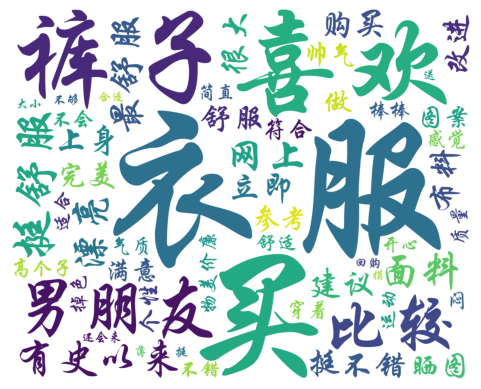

In [53]:
# 导入所需要使用的包
from matplotlib import pyplot as plt
from wordcloud import WordCloud 
# 词云显示
font = r'C:\Windows\Fonts\STXINGKA.TTF'  # 华文行楷
wc = WordCloud(font_path = font, background_color = 'white',width = 1000, height = 800).generate(" ".join(new_data))
plt.imshow(wc)   
plt.axis('off')  # 不显示坐标轴
plt.show()       # 显示图片